In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [17]:
raw_data=pd.read_csv('../data/winequality-red.csv')

In [ ]:
raw_data.head()

In [ ]:
fig,ax=plt.subplots(180,1, figsize=(25,255))
i=0
for col in raw_data.columns:
    ax[i].scatter(raw_data[col],raw_data['quality'])
    ax[i].set_title(col)
    i+=1

In [ ]:
c=raw_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(c,annot=True,lw=0.01,mask=np.abs(c)<0.3)
plt.show()

In [ ]:
raw_data.describe()

In [ ]:
for col in raw_data.columns.values:
    print(f"column {col}: {raw_data[col].isna().sum()}")

In [ ]:
sns.pairplot(raw_data)

In [12]:
columns = ['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
for col in columns:
    cname=col+'_3'
    raw_data[cname]=np.power(raw_data[col],3)

In [13]:
columns = ['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
for col in columns:
    for col2 in columns:
        cname=col+col2
        raw_data[cname]=raw_data[col]*raw_data[col2]

In [8]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for col in columns:
    cname=col+'_log'
    raw_data[cname]=np.log(raw_data[col])

c:\Users\whipk\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
for col in columns:
    cname=col+'_sin'
    raw_data[cname]=np.sin(raw_data[col])

In [14]:
columns =['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']
for col in columns:
    cname=col+'_e'
    raw_data[cname]=np.exp(raw_data[col])

In [15]:
raw_data_scaled_minmax=raw_data
columns = raw_data.columns
for col in columns:
    scale=MinMaxScaler().fit(raw_data[[col]])
    raw_data_scaled_minmax[col]=scale.transform(raw_data[[col]])

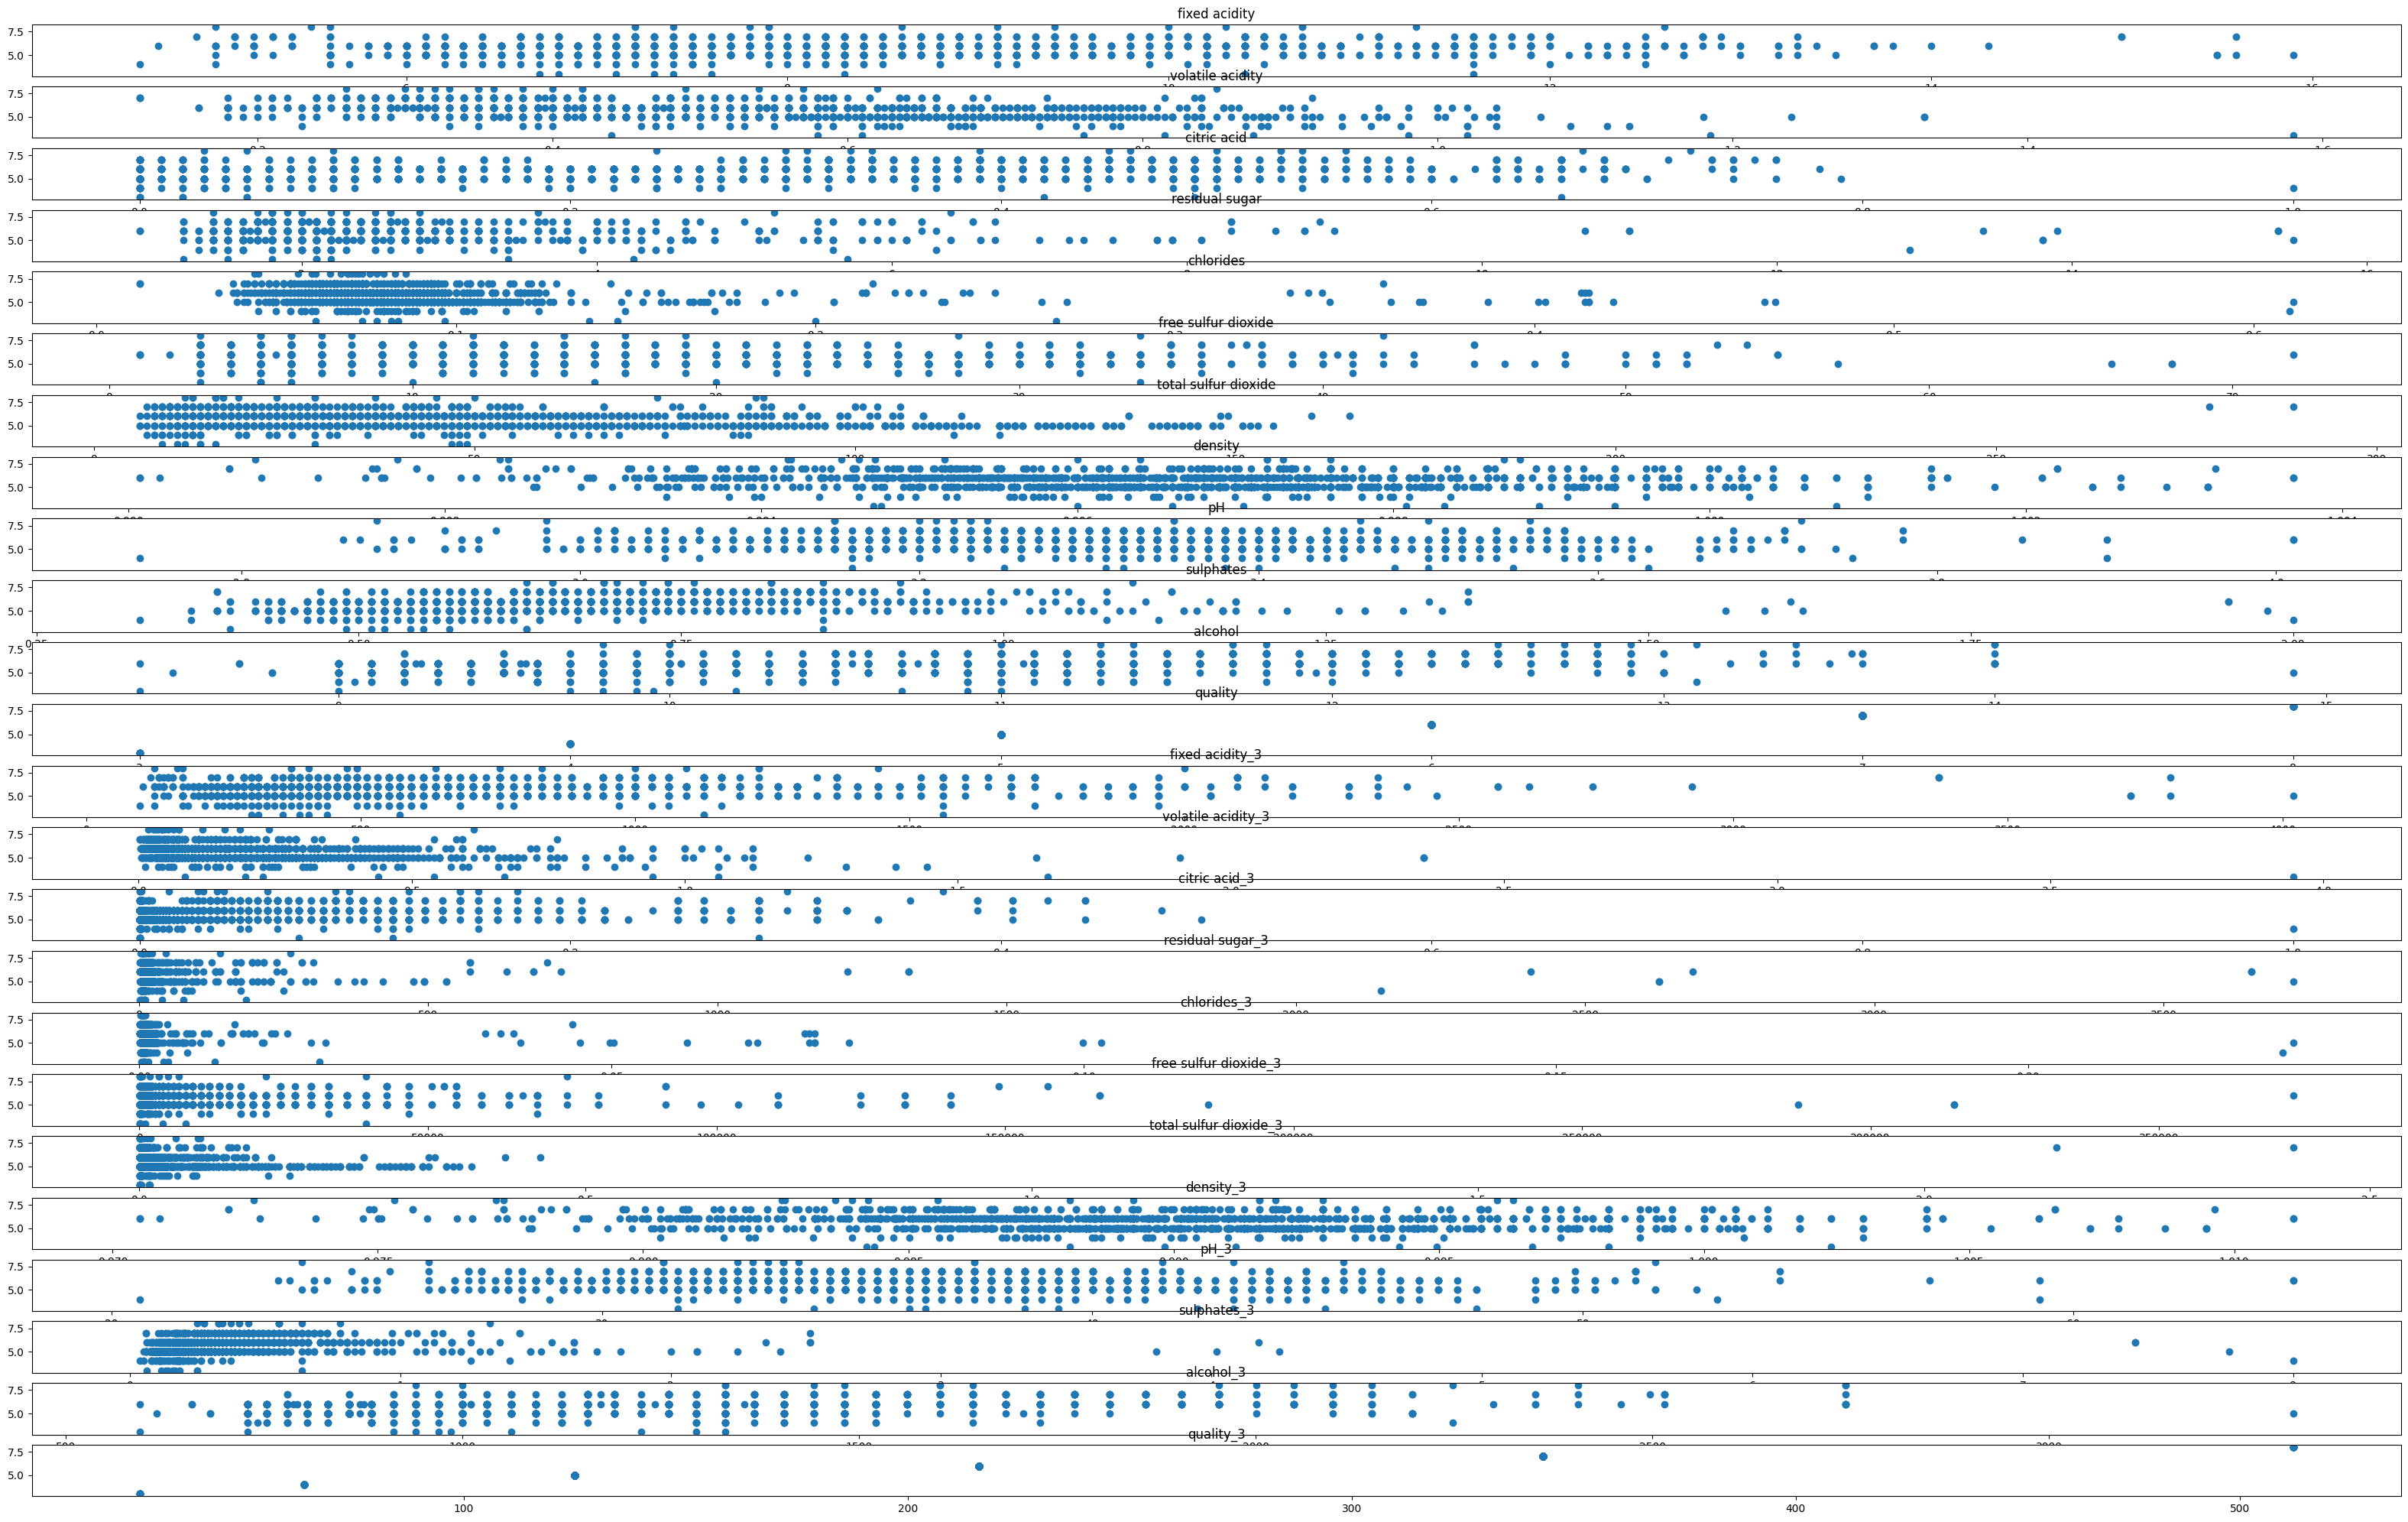

In [4]:
fig,ax=plt.subplots(24,1, figsize=(40,25))
i=0
for col in raw_data.columns:
    ax[i].scatter(raw_data[col],raw_data['quality'])
    ax[i].set_title(col)
    i+=1

In [ ]:
fig,ax=plt.subplots(36,1, figsize=(10,25))
i=0
for col in raw_data.columns:
    ax[i].scatter(raw_data[col],raw_data['quality_log'])
    ax[i].set_title(col)
    i+=1

In [16]:
raw_data_scaled_minmax.to_csv('../data/raw_data_4.csv')